<a href="https://colab.research.google.com/github/dcrp1234/Accelerated_Calculus_Project/blob/main/Final%20Submission/Calculus_Project_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing python libraries

# numpy is used for mathematical operation support
import numpy as np

# matplotlib helps make plots (graphs) in python
import matplotlib.pyplot as plt

# Axes3D module from library mpl_toolkits.plot3d helps plot 3-dimensional graphs in Python
from mpl_toolkits.mplot3d import Axes3D

# ipywidgets library allows interactivity with the plots, also provies a slider to change values
from ipywidgets import FloatSlider, interact
import ipywidgets as widgets

# display allows widgets rendering in notebooks
from IPython.display import display

# integrate module form scipy library allows mathematical integration
# scipy uses C
import scipy.integrate as integrate

# Arc Length of a Curve
Using the arc length formula $ s = \int_{t_1}^{t_2} |r \prime (t)| \, dt$ to find the perimeter of an ellipse with semi-major axis equal to 1 and semi-minor axis equal to $b$.

Formula for ellipse $r(t) = \left(\cos t, b\sin t\right) \quad \text{where} \quad s \in [0, 2\pi]$.

Arc-length of ellipse using arc length formula and integrating over a quarter four times to get the entire perimeter:
$s = 4 \int_{0}^{\pi/2} \sqrt{\sin^2 t + b^2\cos^2 t} \, dt $

$s = 4 \int_{0}^{\pi/2} \sqrt{1 - (1-b^2)\cos^2 t} \, dt $

Substituting $ x = \frac{\pi}{2} -t$

$s = 4 \int_{0}^{\pi/2} \sqrt{1 - (1-b^2)\sin^2 t} \, dt $

This type of equations are called elliptic integrals of the second kind, find out more [here](https://www.mhtlab.uwaterloo.ca/courses/me755/web_chap3.pdf). These integrals give infinite series expansion, hence solving them are compuationally expensive hence we need better approximations.


Graphing this integral and comparing it with the approximation for perimeter given by a famous mathematician Ramanujan, his equation is:

$\pi \left( 3 \left( a+b \right) - \sqrt{\left(a +3b\right)\left(3a+b\right) }\right)$

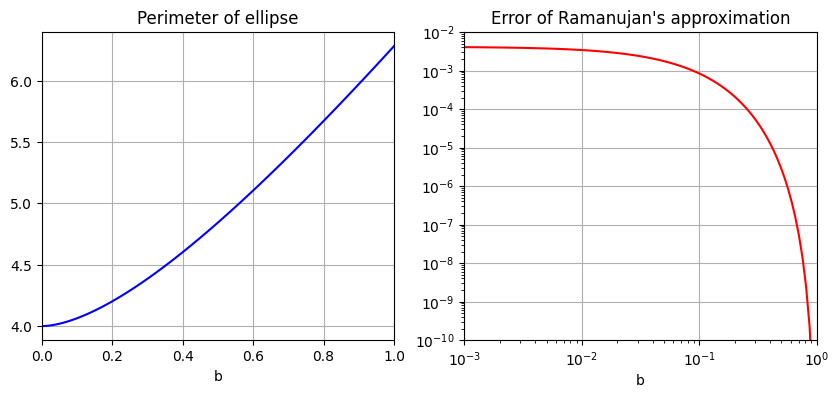

In [ ]:
#Setting up the axes
'''np.linspace(a, b, n) creates n number of linearly spaced values between range
 a and b'''
b_lin = np.linspace(0, 1, 100)
'''np.linspace(a, b, n) creates n number of logarithmically spaced values
between 10^a and 10^b'''
b_log = np.logspace(-3, 0, 100)
'''perim and error are defined as arrays with every element intialized as zeros
these will later be used to store the perimeter by solving x and the error in
Ramanujans equation for each value in b_lin and b_log'''
perim = np.zeros(100)
error = np.zeros(100)

#Defining the arc length equation for perimeter
def integrand(x, b):
  '''Defining the integrand in terms of x instead of t from description above'''
  return np.sqrt(1-(1-b**2)*np.sin(x)**2)

#Defining Ramanujan equation
def Ramanujan(b):
  return np.pi*(3*(1+b) - np.sqrt((1+3*b)*(3+b)))

# Evaluating perimeter for different values of semi-minor axis(b) between 0 and 1
for i, b in enumerate(b_lin):
  '''Assigning perimeter equation to f, with linear semi-minor axis'''
  f = lambda x: integrand(x, b)
  '''Integrating f over 0 to pi/2 using the integrate module from scipy'''
  s = integrate.quad(f, 0, np.pi/2)
  '''Storing the resultant perimeter with cretain b value at index i'''
  perim[i] = 4*s[0]

# Evaluating fractional error for different values of semi-minor axis(b) between 10^-3 and 1
for i, b in enumerate(b_log):
  '''Assigning perimeter equation to f, with logarithmic semi-minor axis'''
  f = lambda x: integrand(x, b)
  s = integrate.quad(f, 0, np.pi/2)
  error[i]= 1-Ramanujan(b)/(4*s[0])

# Creates a figue of size 10 X 4 inches with two sunplots (ax1 and ax2) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

#Setting up the the Perimeter plot on the left
ax1.plot(b_lin, perim, 'blue')
ax1.set_xlim([0, 1])
ax2.set_ylim([4, 6.5])
ax1.set(xlabel = 'b')
ax1.set(title = 'Perimeter of ellipse')
ax1.grid('on')

#Setting up the Error in Ramanujans' plot on the right
'''Both axes are plotted in log-scale so we use loglog'''
ax2.loglog(b_log, error, 'red')
'''1e-a = 10^a'''
ax2.set_xlim([1e-3, 1])
ax2.set_ylim([1e-10, 1e-2])
ax2.set(xlabel = 'b')
ax2.set(title = "Error of Ramanujan's approximation")
ax2.grid('on')

#Displaying the plots
plt.show()

The plot on the *left* shows the euation for th eperimeter and on the *right* the error in Ramanujans' approximation.



# Curvature
Finding the curvature of a special parametric curve called *Lemniscate of Bernoulli* $r(t) = \left( \frac{\cos t}{1+\sin^2 t}, \frac{\cos t \sin t}{1+\sin^2 t}\right) \, \quad \text{where} \quad s \in [0, 2\pi] $

Curvature $\kappa = \frac{| r\prime(t) \times r \prime\prime (t)|}{|r\prime (t)|^3}$

For this equation the curvature holds as $\kappa = \frac{3 |\cos t|}{\sqrt{1 + \sin^2 t}}$

This code demonstrates the **parametric representation** of the **Lemniscate of Bernoulli**, a figure-eight shaped curve, and its **curvature**. The equations $r_x(t)$ and $r_y(t)$ define the curve, while $kappa(t)$ represents the curvature at each point. The graph updates interactively, showing both the curve and its curvature as $t$ changes, with the curvature reflecting how sharply the curve bends at each point.

In [ ]:
#Defining the Lemniscate of Bernoulli's equation and the value of Kappa
rx = lambda t: np.cos(t) / (1 + np.sin(t)**2)
ry = lambda t: np.sin(t) * np.cos(t) / (1 + np.sin(t)**2)
kappa = lambda t: 3 * np.abs(np.cos(t)) / (1 + np.sin(t)**2)

# Creating slider widget
t_slider = FloatSlider(value=0, min=0, max=4 * np.pi, step=0.01, description='t')

# Defining a function that updates the graph every time slider value is updated
def update(t):
    # Creates an evenly spaced values for smoothness of curve
    T = np.linspace(0, t, 200)

    #Creates figures for two subplots side by side of size 10X 6 inches
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
    plt.subplots_adjust(bottom=0.2)

    # First subplot for parametric curve to the left
    '''set_aspect('equal') prevents distortion of the images'''
    ax1.set_aspect('equal')
    ax1.set_ylim(-0.5, 0.5)
    ax1.set_xlim(-1.2, 1.2)
    ax1.title.set_text('Parametric curve')
    ax1.grid('on')

    ax1.plot(rx(T), ry(T), 'b', markersize=3)
    ax1.plot(rx(t), ry(t), 'ro', markersize=6)

    # Second subplot for curvature to the right
    ax2.set_aspect('equal')
    ax2.set_ylim(-1, 4)
    ax2.set_xlim(0, 4 * np.pi)
    ax2.title.set_text('Curvature')
    ax2.grid('on')

    ax2.plot(T, kappa(T), 'r', markersize=3)
    ax2.plot(t, kappa(t), 'bo', markersize=6)

    plt.show()

# Use interact to link the update function with the slider
interact(update, t=t_slider)


interactive(children=(FloatSlider(value=0.0, description='t', max=12.566370614359172, step=0.01), Output()), _…

<function __main__.update(t)>

The parametic curve plot to the *left* and the change in curvature to the *right*.

# Torsion

Torsion is the extent by which a curve tries to escape from a '2D' plane.

Curve used
$
\mathbf{r}(t) = \left( \cos s, \sin s, \frac{s^2}{20} \right) \quad \text{where} \quad s \in [0, 6\pi]
$

${Torsion} = \frac{r\prime \times r\prime\prime \cdot r\prime\prime\prime}{| r\prime \times r\prime\prime |^2}$

For this curve the Torsion $\tau$ is calculated to be:

$\tau = \frac{10s}{s^2 + 101}$

$Curvature = \kappa$ and $ r\prime\prime = \kappa n$
Where $n$ is the unit normal vector, and $t$ is the unit tangent vector. Binormal, $b$ can be defined as a unit vector that is orthogonal to both $t$ and $n$. The vector $\{t, n, b\}$ can be used to define any point on the curve and is called the **Frenet-Serret Frame**.

![Unit vectors on a curve in space](https://calcworkshop.com/wp-content/uploads/unit-tangent-normal-and-binormal-vectors.png)

Frames in $R^3$ holds the following equation true:
- $t\prime = \kappa n$
- $n \prime = - \kappa t + \tau b$
- $b\prime= -\tau b$

 In the Frenet-Serret formulas, the torsion $\tau$ is given by:
  
  $\tau = \frac{d\mathbf{B}}{ds}$
  where $ds$ is the arc length parameter. Torsion measures how the curve "twists" out of the plane formed by the tangent and normal vectors.

  The **parametric curve** defined in the code is being traced in space, and the torsion is plotted to show how the curve's binormal vector changes, indicating the curve's twisting behavior along its length.

It shows the change of torsion or $\tau$ with the position of the terminal point in the helix in the domain $[0, 20]$.

In [ ]:
#Defining the parametric curve equation
rx = lambda t: np.sin(t)
ry = lambda t: np.cos(t)
rz = lambda t: t**2 / 20
tau = lambda t: 10 * t / (t**2 + 101)

#Defining function that will create the plot, and be called everytime the value of t changes
def plot_interactive(t=0):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(121, projection='3d')

    #Setting the value of T and P to the current value in slider
    T = np.linspace(0, t, 100)
    P = T[-1:]

    #Setting up plot for the parametric curve on the left
    ax1.plot(rx(T), ry(T), rz(T), 'b', markersize=3)
    ax1.plot(rx(P), ry(P), rz(P), 'ro', markersize=6)
    ax1.set_title('Parametric curve')
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(0, 20)

    #Setting up plot for Torsion on the right
    ax2 = fig.add_subplot(122)
    ax2.set_aspect(8)
    ax2.set_title('Torsion')
    ax2.set_xlim(0, 6 * np.pi)
    ax2.set_xlabel('t')
    ax2.set_ylim(0, 0.6)
    ax2.grid(True)

    ax2.plot(T, tau(T), 'r', markersize=3)
    ax2.plot(P, tau(P), 'bo', markersize=6)

    plt.show()

# Create interactive slider using ipywidgets
t_slider = widgets.FloatSlider(value=0, min=0, max=6 * np.pi, step=0.001, description='t')

# Display the interactive plot with the slider
widgets.interactive(plot_interactive, t=t_slider)


interactive(children=(FloatSlider(value=0.0, description='t', max=18.84955592153876, step=0.001), Output()), _…

The parametric curve plot to the *left* and the torsion plot to the *right*.

# References

- Exploring University Mathematics with Python, Siri Chongchitnan
- Accelerated Calculus 3, University of Lethbridge
